In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [8]:
cars_df = pd.read_csv("cars-dataset.csv")

In [9]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [5]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [10]:
cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [25]:
# drop the car name and origin columns
cars_df = cars_df.drop('car name', axis=1)

In [26]:
cars_df = cars_df.replace('?', np.nan)
cars_df = cars_df.dropna()

In [14]:
cars_df[cars_df['car name'].apply(lambda x: x.isnumeric())]

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [27]:
cars_df['hp'] = cars_df['hp'].astype('float64')
#cars_df['hp'].replace('?', cars_df['hp'].median())

In [28]:
cars_df['hp'].isnull().value_counts()

False    392
Name: hp, dtype: int64

In [29]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


## Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points


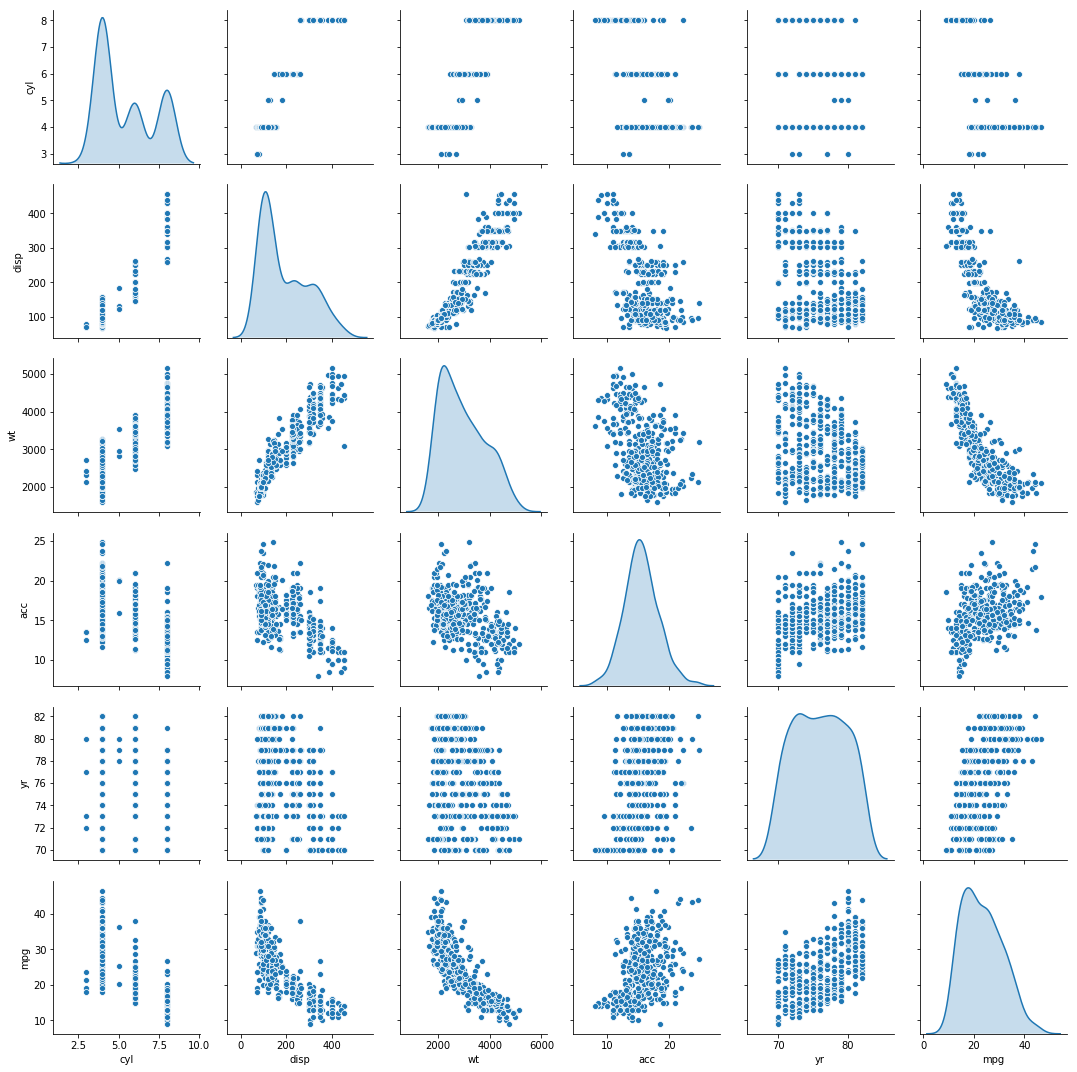

In [12]:
# Pair plot analysis

sns.pairplot(cars_df, diag_kind='kde')   # to plot density curve instead of histogram

Text(0.5,0,'horsePower')

Text(0,0.5,'mpg')

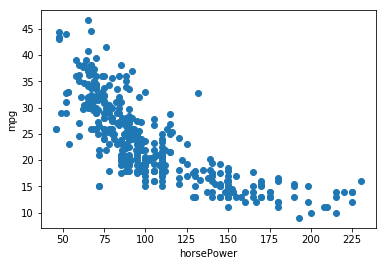

In [30]:
plt.scatter(cars_df.hp, cars_df.mpg, )
plt.xlabel('horsePower')
plt.ylabel('mpg')

In [20]:
X = cars_df.drop('car name', axis=1)
Y = cars_df[['car name']]
X.shape
Y.shape

(398, 7)

(398, 1)

## K - Mean Clustering

In [31]:
from scipy.stats import zscore

cars_df_z = cars_df.apply(zscore)

In [32]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(cars_df_z, labels, metric='euclidean'))


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,num_clusters,cluster_errors,Avg Sil Score
0,2,1272.900760,0.481209
1,3,928.916349,0.353616
2,4,725.327184,0.348754
3,5,654.625777,0.312191
4,6,592.003875,0.282884
5,7,540.390878,0.260441
6,8,488.052716,0.266283
7,9,456.106285,0.263468


<Figure size 864x432 with 0 Axes>

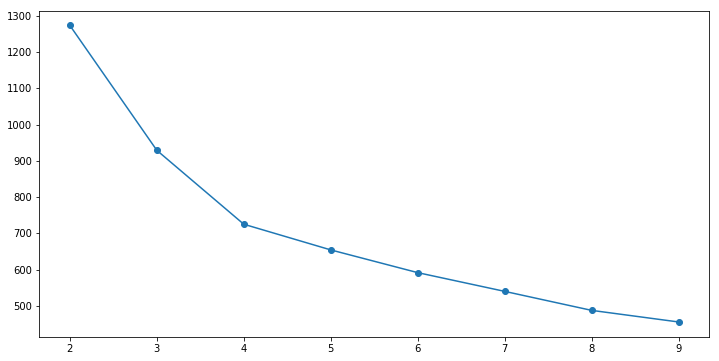

In [33]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## Find out the optimal value of K

The elbow plot shows that 4 might be a good choice for K

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [48]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(cars_df_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [49]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.687917,-0.509155,-0.613115,-0.061810,1.420394,1.215103,0.591283
1,1.483947,1.658159,1.818132,1.452308,-1.329686,-1.119186,-1.240539
2,-0.864014,-0.916486,-0.973735,-1.013367,1.392368,-0.799817,0.372792
3,0.309967,0.233408,-0.111205,0.112509,-0.030121,-0.757032,-0.573915
4,-0.864014,-0.949490,-0.965743,-1.078153,0.490725,1.048230,1.557523
5,-0.884610,-0.819356,-0.431160,-0.725466,-0.088858,-0.752661,0.188115
6,1.455995,1.172062,0.962665,1.220214,-0.600873,0.102622,-0.953684
7,-0.732240,-0.597965,-0.304726,-0.517630,-0.417186,0.915280,0.548883
8,0.421774,0.358291,-0.116882,0.513017,0.786042,0.458565,-0.520259


In [50]:
prediction=cluster.predict(cars_df_z)

In [51]:
cars_df_z["GROUP"] = prediction

In [52]:
cars_df_z.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,94,94,94,94,94,94,94
1,89,89,89,89,89,89,89
2,100,100,100,100,100,100,100
3,109,109,109,109,109,109,109


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C98AA63C8>,
      dtype=object)

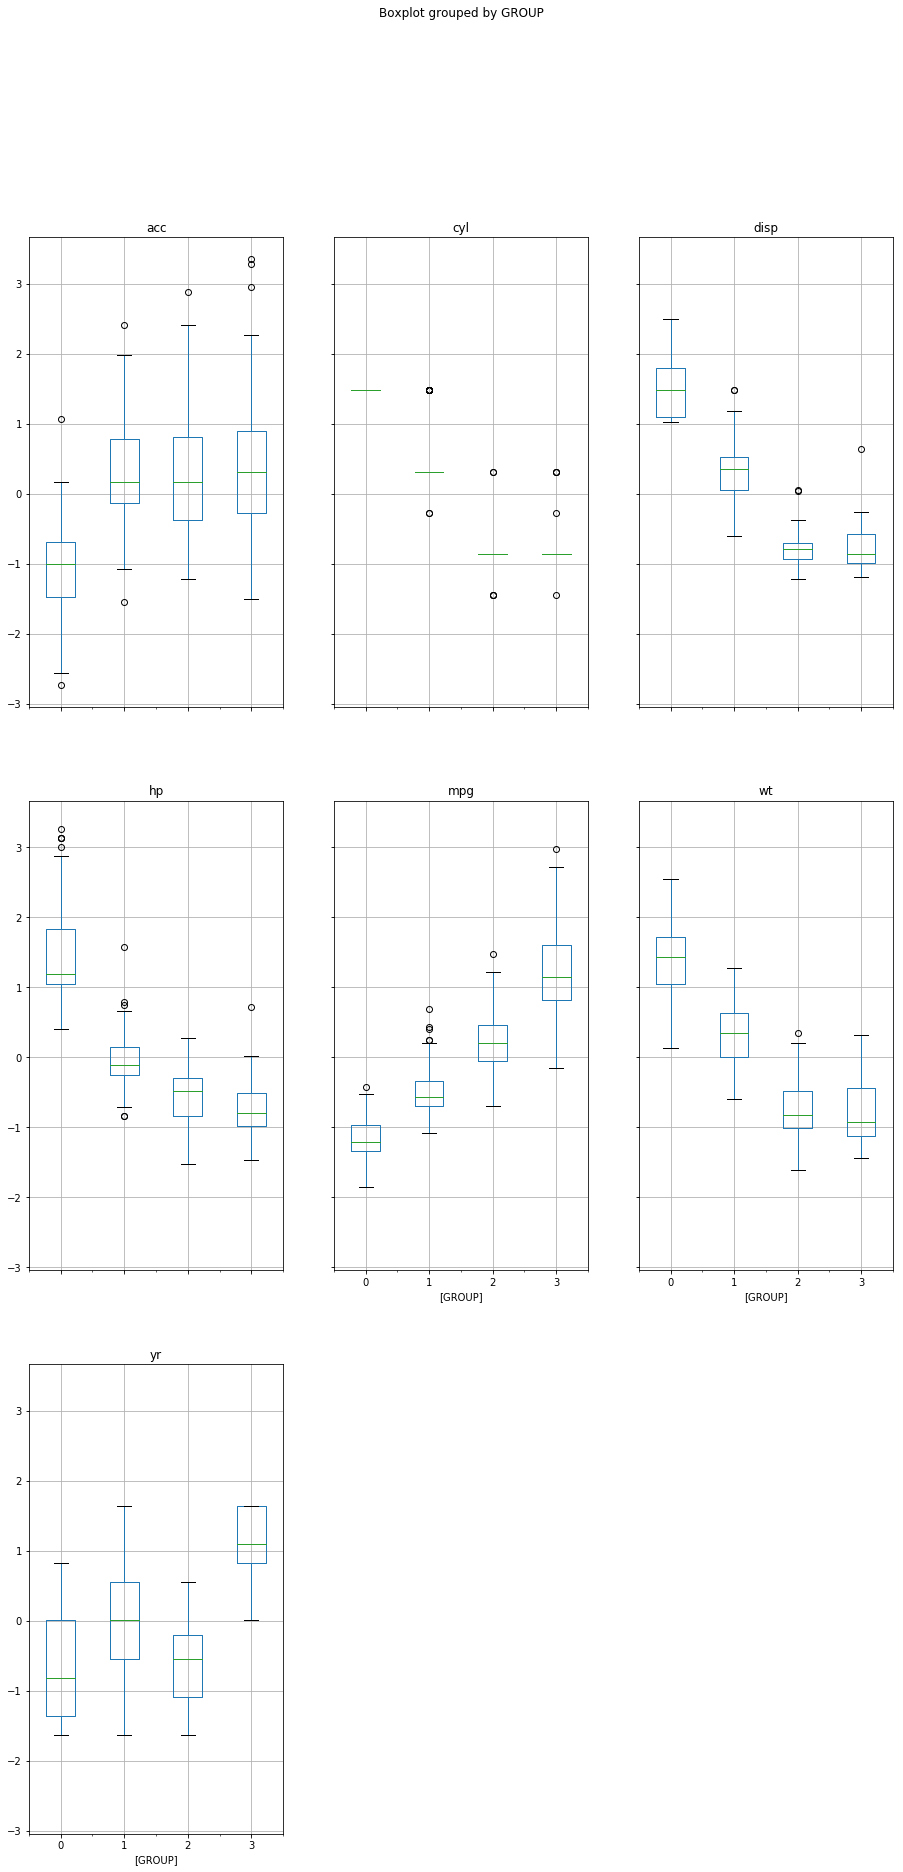

In [53]:
import matplotlib.pylab as plt

cars_df_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))


## Hierarchical Clustering 

### Find out the linkage matrix

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [56]:
model.fit(cars_df_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6,
            pooling_func=<function mean at 0x0000021C91AC2C80>)

In [57]:
cars_df_z['labels'] = model.labels_

cars_df_z.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
labels,,,,,,,,
0,107,107,107,107,107,107,107,107
1,94,94,94,94,94,94,94,94
2,91,91,91,91,91,91,91,91
3,2,2,2,2,2,2,2,2
4,1,1,1,1,1,1,1,1
5,97,97,97,97,97,97,97,97


Use ward as linkage metric and distance as Eucledian

In [58]:
clusters = cars_df_z.groupby(['labels'])

In [59]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [60]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [61]:

Z = linkage(cars_df_z, 'average')
c, coph_dists = cophenet(Z , pdist(cars_df_z))

c

0.8425702522809152

In [62]:
Z.shape

Z[1]
Z[1:10]

(391, 4)

array([3.49000000e+02, 3.50000000e+02, 1.22195135e-01, 2.00000000e+00])

array([[3.49000000e+02, 3.50000000e+02, 1.22195135e-01, 2.00000000e+00],
       [3.45000000e+02, 3.47000000e+02, 1.49428116e-01, 2.00000000e+00],
       [2.32000000e+02, 2.34000000e+02, 1.83830564e-01, 2.00000000e+00],
       [6.70000000e+01, 6.80000000e+01, 1.90564821e-01, 2.00000000e+00],
       [1.27000000e+02, 1.43000000e+02, 2.14910098e-01, 2.00000000e+00],
       [3.40000000e+01, 3.60000000e+01, 2.20129625e-01, 2.00000000e+00],
       [6.30000000e+01, 7.40000000e+01, 2.32511842e-01, 2.00000000e+00],
       [1.40000000e+01, 2.10000000e+01, 2.40452544e-01, 2.00000000e+00],
       [2.83000000e+02, 2.86000000e+02, 2.47984582e-01, 2.00000000e+00]])

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5,0,'sample index')

Text(0,0.5,'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [80.0, 80.0, 103.75, 103.75],
  [65.0, 65.0, 91.875, 91.875],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [142.5, 142.5, 170.0, 170.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [185.0, 185.0, 203.75, 203.75],
  [156.25, 156.25, 194.375, 194.375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [175.3125, 175.3125, 242.5, 242.5],
  [78.4375, 78.4375, 208.90625, 208.90625],
  [42.5, 42.5, 143.671875, 143.671875],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [305.0, 305.0, 331.25, 331.25],
  [365.0, 365.

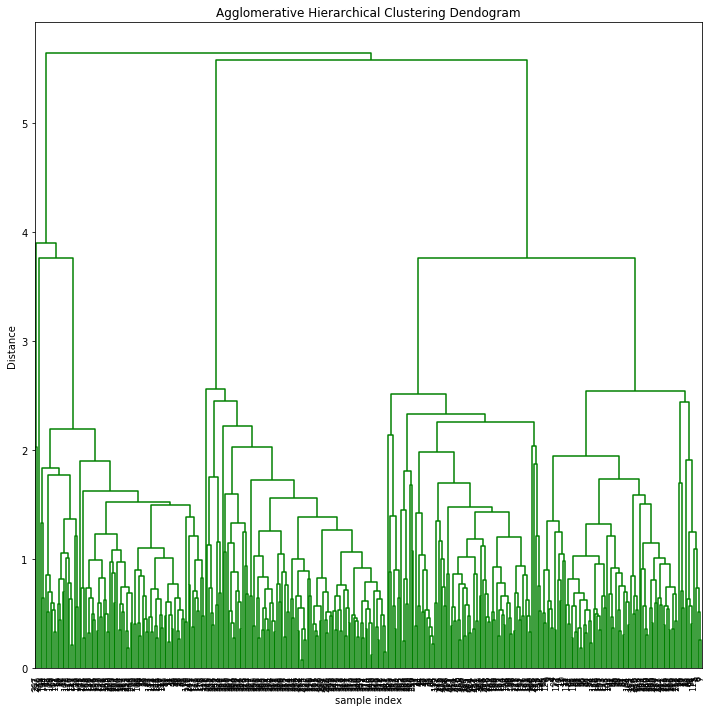

In [63]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

In [64]:
cars_df_z=cars_df_z.drop('labels', axis=1)

In [65]:
Group1_df=cars_df_z[cars_df_z["GROUP"]==0]
Group2_df=cars_df_z[cars_df_z["GROUP"]==1]
Group3_df=cars_df_z[cars_df_z["GROUP"]==2]
Group4_df=cars_df_z[cars_df_z["GROUP"]==3]

In [66]:
Group1_df.shape
Group2_df.shape
Group3_df.shape
Group4_df.shape

(94, 8)

(89, 8)

(100, 8)

(109, 8)

In [67]:
X1 = Group1_df.drop('mpg', axis=1)
X1=X1.drop('GROUP', axis=1)
X2 = Group2_df.drop('mpg', axis=1)
X2=X2.drop('GROUP', axis=1)
X3 = Group3_df.drop('mpg', axis=1)
X3=X3.drop('GROUP', axis=1)
X4 = Group4_df.drop('mpg', axis=1)
X4=X4.drop('GROUP', axis=1)


y1 = Group1_df[['mpg']]
y2 = Group2_df[['mpg']]
y3 = Group3_df[['mpg']]
y4 = Group4_df[['mpg']]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30 , random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30 , random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30 , random_state=1)

In [70]:
from sklearn.linear_model import LinearRegression
regression_model1 = LinearRegression()
regression_model2 = LinearRegression()
regression_model3 = LinearRegression()
regression_model4 = LinearRegression()

regression_model1.fit(X1_train, y1_train)
regression_model2.fit(X2_train, y2_train)
regression_model3.fit(X3_train, y3_train)
regression_model4.fit(X4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.005438000316861299
The coefficient for hp is -0.16824905914180166
The coefficient for wt is -0.14063887847574844
The coefficient for acc is -0.16757562427033687
The coefficient for yr is 0.14688718752033497


In [72]:
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for cyl is 0.2865850341379741
The coefficient for disp is 0.0013456245844646428
The coefficient for hp is -0.14886122360574755
The coefficient for wt is -0.518902687020869
The coefficient for acc is -0.0033831183677506503
The coefficient for yr is 0.22440618535525142


In [73]:
for idx, col_name in enumerate(X3_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[0][idx]))

The coefficient for cyl is 0.6891653765099864
The coefficient for disp is -0.7250913626994832
The coefficient for hp is -0.20993332220001568
The coefficient for wt is -0.4919803738772842
The coefficient for acc is -0.07544991345355129
The coefficient for yr is 0.16666967235249094


In [74]:
for idx, col_name in enumerate(X4_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model4.coef_[0][idx]))

The coefficient for cyl is 0.7513901379726915
The coefficient for disp is 0.17646596688662086
The coefficient for hp is -0.6514526818403056
The coefficient for wt is -0.9118838279301601
The coefficient for acc is 0.10264807039887971
The coefficient for yr is 0.4369011862300708


In [34]:
x = cars_df[['hp']]
y = cars_df['mpg']

## Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)


In [35]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [38]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Train R^2
print(regression_model.score(x_train, y_train))

0.6042048006827028


In [40]:
# Test R^2
print(regression_model.score(x_test, y_test))

0.6059927446641062


In [41]:
# Train MSE
predictedMpg = regression_model.predict(x_train)
print(mean_squared_error(predictedMpg, y_train))

23.073137254420594


In [42]:
# Test MSE
predictedMpg = regression_model.predict(x_test)
print(mean_squared_error(predictedMpg, y_test))

26.194975304568544


In [43]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 2, include_bias = False) 
#xPoly_train = poly.fit_transform(x_train)
#xPoly_train[0:2]

In [44]:
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

array([[  88., 7744.],
       [  82., 6724.]])

In [45]:
regression_model.coef_

array([-0.15698695])